In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<h2>Positive Cases and Death Trends of NY and NYC</h2>

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [3]:
#Query to get NY data
nyDf=df.query("state=='New York'")
# nyDf=df.loc[df['state']=='New York',:]
nyDf.drop('fips',axis=1,inplace=True)
nyDf.head()

/Users/Teresa/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,county,state,cases,deaths
416,2020-03-01,New York City,New York,1,0
448,2020-03-02,New York City,New York,1,0
482,2020-03-03,New York City,New York,2,0
518,2020-03-04,New York City,New York,2,0
519,2020-03-04,Westchester,New York,9,0


In [4]:
#Cumulative sum of cases in NY per day
cumsumNYDf=nyDf.groupby('date').sum().rename(columns={'cases':'NY Cases','deaths':'NY Deaths'})
cumsumNYDf.head()

,NY Cases,NY Deaths
date,,
2020-03-01,1,0
2020-03-02,1,0
2020-03-03,2,0
2020-03-04,11,0
2020-03-05,22,0


In [5]:
#Query to get NYC data
nycDf=nyDf.query("county=='New York City'|county=='Bronx'| county=='Kings'|county=='Staten Island' | county=='Queens'")
nycDf.head()

,date,county,state,cases,deaths
416,2020-03-01,New York City,New York,1,0
448,2020-03-02,New York City,New York,1,0
482,2020-03-03,New York City,New York,2,0
518,2020-03-04,New York City,New York,2,0
565,2020-03-05,New York City,New York,4,0


In [6]:
#Cumulative sum of cases in NY per day
cumsumNYCDf=nycDf.groupby('date').sum().rename(columns={'cases':'NYC Cases','deaths':'NYC Deaths'})
cumsumNYCDf.head()

,NYC Cases,NYC Deaths
date,,
2020-03-01,1,0
2020-03-02,1,0
2020-03-03,2,0
2020-03-04,2,0
2020-03-05,4,0


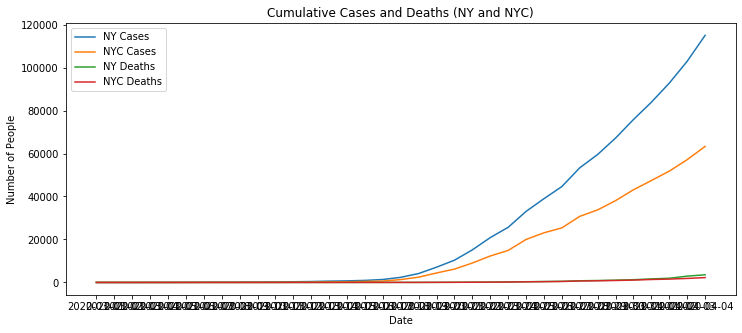

In [7]:
# Cumulated sum of deaths and cases in NY and NYC
plt.figure(figsize=(12,5))

plt.plot(cumsumNYDf['NY Cases'],label='NY Cases')
plt.plot(cumsumNYCDf['NYC Cases'],label='NYC Cases')
plt.plot(cumsumNYDf['NY Deaths'],label='NY Deaths')
plt.plot(cumsumNYCDf['NYC Deaths'],label='NYC Deaths')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.title('Cumulative Cases and Deaths (NY and NYC)')
plt.legend()

plt.show()

<h2>Trends of New Cases, Hospitalized Cases, and Death</h2>

In [8]:
nycHospitalData=pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/case-hosp-death.csv')
nycHospitalData['DEATH_COUNT'].fillna(0,inplace=True)
nycHospitalData['HOSPITALIZED_CASE_COUNT'].fillna(0,inplace=True)
nycHospitalData['NEW_COVID_CASE_COUNT'].fillna(0,inplace=True)
nycHospitalData['DATE_OF_INTEREST'].dropna(inplace=True)
nycHospitalData.head()

,DATE_OF_INTEREST,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT
0,3/2/20,1,3.0,0.0
1,3/3/20,2,3.0,0.0
2,3/4/20,10,5.0,0.0
3,3/5/20,2,4.0,0.0
4,3/6/20,8,5.0,0.0


<Figure size 864x360 with 0 Axes>

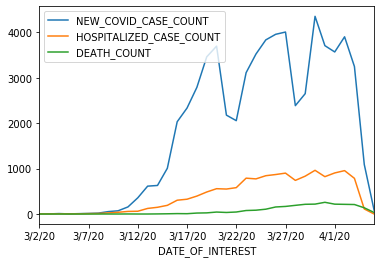

In [9]:
plt.figure(figsize=(12,5))
nycHospitalData.plot(x='DATE_OF_INTEREST')
plt.show()